In [3]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1 tensorflow==2.11.0
# Note: If your environment doesn't support "!mamba install", use "!pip install"
!pip install -U ucimlrepo
!pip install -U seaborn==0.9.0
!pip install tensorflow==2.11.0  # or any latest TensorFlow 2.x version


[notice] A new release of pip is available: 23.0 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Invalid requirement: '#'

[notice] A new release of pip is available: 23.0 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
from ucimlrepo import fetch_ucirepo
from datetime import datetime
from tensorflow.keras.datasets import cifar10
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import tensorflow as tf

tf.__version__

'1.15.0'

In [121]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Convert to DataFrame
train_df = pd.DataFrame({'image': list(x_train), 'label': y_train.flatten()})
test_df = pd.DataFrame({'image': list(x_test), 'label': y_test.flatten()})

In [29]:
# variable information 
train_df.describe().round(2)
train_df.describe().round(2)

,label
count,50000.00
mean,4.50
std,2.87
min,0.00
25%,2.00
50%,4.50
75%,7.00
max,9.00


In [30]:
# variable information 
test_df.describe().round(2)
test_df.describe().round(2)

,label
count,10000.00
mean,4.50
std,2.87
min,0.00
25%,2.00
50%,4.50
75%,7.00
max,9.00


In [31]:
#get statistics for the features
train_df.quantile([0.01, 0.25, 0.5, 0.75, 0.99])

,label
0.01,0.0
0.25,2.0
0.50,4.5
0.75,7.0
0.99,9.0


In [32]:
#get statistics for the features
test_df.quantile([0.01, 0.25, 0.5, 0.75, 0.99])

,label
0.01,0.0
0.25,2.0
0.50,4.5
0.75,7.0
0.99,9.0


In [33]:
#check target for null values
train_df.isnull().sum()

image    0
label    0
dtype: int64

In [34]:
#check target for null values
test_df.isnull().sum()

image    0
label    0
dtype: int64

In [35]:
# Combine train and test sets
x_combined = np.concatenate((x_train, x_test), axis=0)
y_combined = np.concatenate((y_train, y_test), axis=0)

# Convert to DataFrame
df = pd.DataFrame({
    'image': list(x_combined),
    'label': y_combined.flatten()
})

In [36]:
def plot_images(df, num_images=10):
    """Plot a number of images from the DataFrame."""
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        ax = axes[i]
        img = df.iloc[i]['image']
        label = df.iloc[i]['label']
        
        ax.imshow(img)
        ax.set_title(f'Label: {label}')
        ax.axis('off')

    plt.tight_layout()
    plt.show()


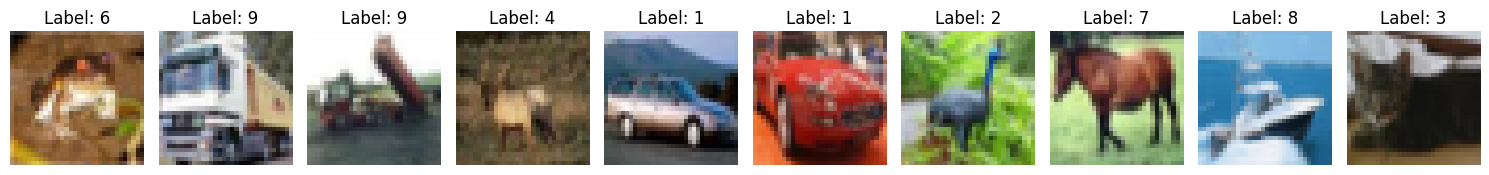

In [37]:
# Plot the first 10 images
plot_images(df, num_images=10)

In [38]:
# Combine train and test sets
x_combined = np.concatenate((x_train, x_test), axis=0)
y_combined = np.concatenate((y_train, y_test), axis=0)

# Compute the average pixel intensity across all images
# Average across all images, then average across all color channels (RGB)
average_image = np.mean(x_combined, axis=0)
average_image = np.mean(average_image, axis=2)  # Convert from (32, 32, 3) to (32, 32)

# Flatten the images
x_flattened = x_combined.reshape(x_combined.shape[0], -1)

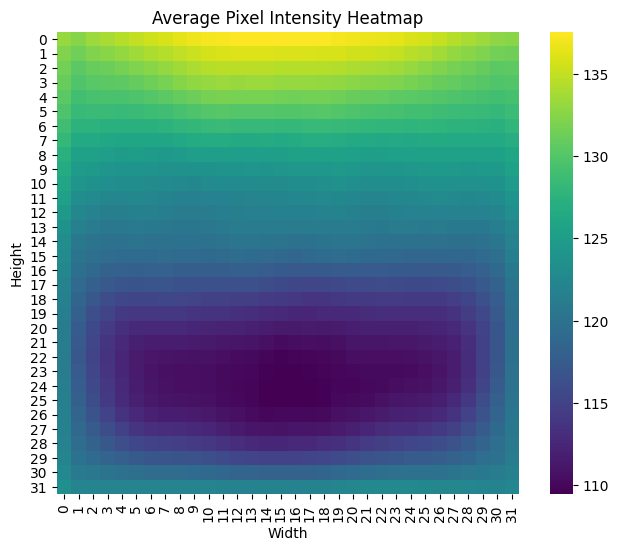

In [39]:
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(average_image, cmap='viridis', square=True, cbar=True, annot=False)

plt.title('Average Pixel Intensity Heatmap')
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()

In [40]:
# Apply PCA to reduce to 5 dimensions
pca = PCA(n_components=5)
x_pca = pca.fit_transform(x_flattened)

# Create a DataFrame with PCA components and labels
df_pca = pd.DataFrame(x_pca, columns=[f'PC{i+1}' for i in range(x_pca.shape[1])])
df_pca['label'] = y_combined.flatten()

<Figure size 1200x1000 with 0 Axes>

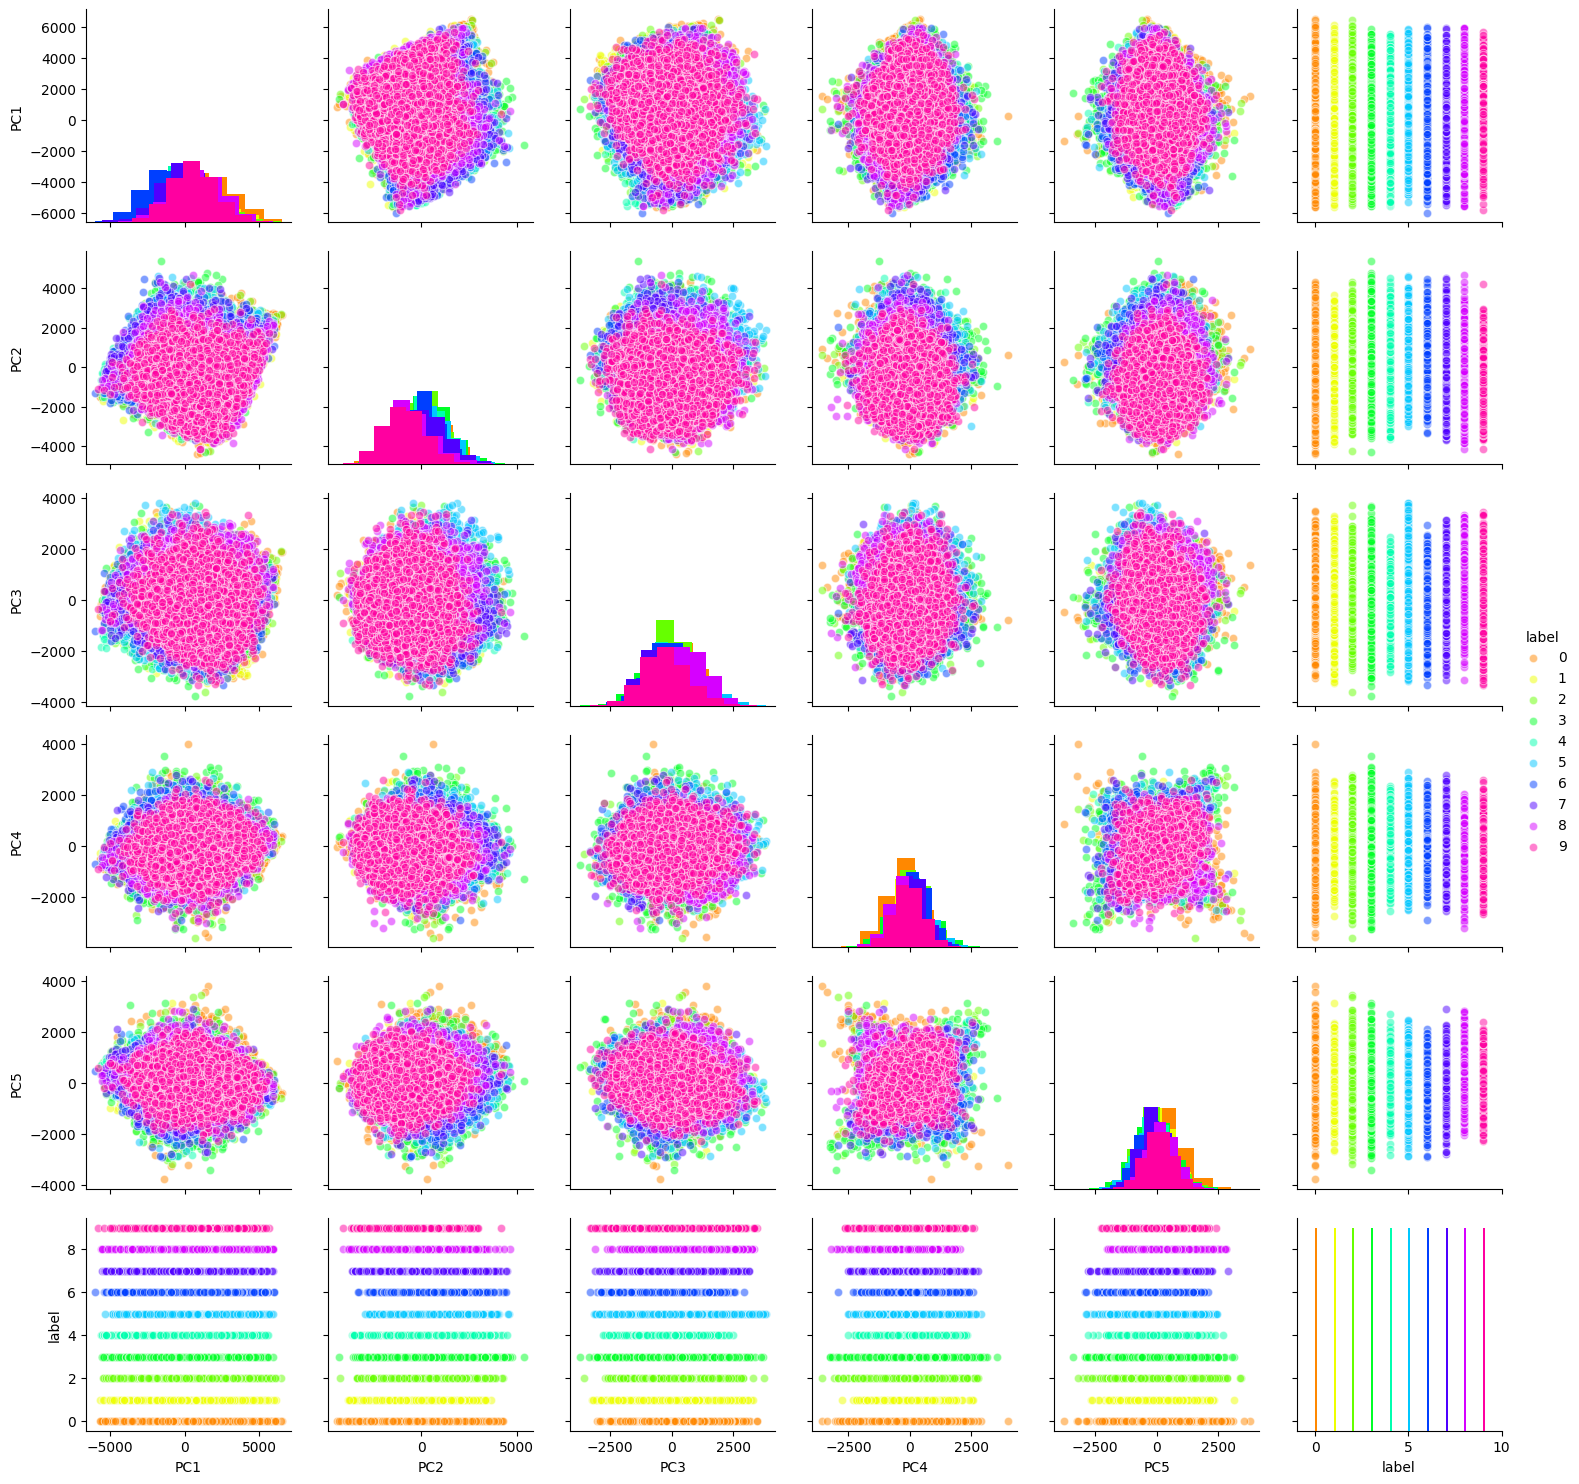

In [16]:
# Set up the color palette to differentiate classes
palette = sns.color_palette("hsv", 10)  # 10 colors for 10 CIFAR-10 classes

# Plot pair plots with histograms on the diagonal
plt.figure(figsize=(12, 10))
sns.pairplot(df_pca, hue='label', palette=palette, diag_kind='hist', plot_kws={'alpha':0.5})

In [122]:
import tensorflow as tf
# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode labels for training
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [123]:
from tensorflow.keras.utils import to_categorical

# Ensure labels are one-hot encoded
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

In [124]:
# Ensure labels are integers for sparse_categorical_crossentropy
y_train = np.array(y_train)  # Integer labels
y_test = np.array(y_test)

In [125]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # Ensure this matches the number of classes
])

In [126]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # For one-hot encoded labels
              metrics=['accuracy'])

In [127]:
history = model.fit(
    x_train, 
    y_train,  # Ensure labels are integers
    epochs=10,
    batch_size=256,
    validation_data=(x_test, y_test)  # Ensure validation labels are integers
)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 53s 1ms/sample - loss: 1.8015 - acc: 0.3317 - val_loss: 1.4606 - val_acc: 0.4729
Epoch 2/10
50000/50000 [==============================] - 50s 1ms/sample - loss: 1.4531 - acc: 0.4752 - val_loss: 1.2785 - val_acc: 0.5394
Epoch 3/10
50000/50000 [==============================] - 49s 974us/sample - loss: 1.3216 - acc: 0.5285 - val_loss: 1.2109 - val_acc: 0.5645
Epoch 4/10
50000/50000 [==============================] - 49s 976us/sample - loss: 1.2165 - acc: 0.5696 - val_loss: 1.1194 - val_acc: 0.6061
Epoch 5/10
50000/50000 [==============================] - 48s 962us/sample - loss: 1.1526 - acc: 0.5945 - val_loss: 1.0818 - val_acc: 0.6133
Epoch 6/10
50000/50000 [==============================] - 48s 967us/sample - loss: 1.0829 - acc: 0.6190 - val_loss: 1.0218 - val_acc: 0.6419
Epoch 7/10
50000/50000 [==============================] - 48s 969us/sample - loss: 1.0341 - acc: 0.6378 - va

In [128]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy}')

# Make predictions
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Add predictions to DataFrame
test_df['predicted_label'] = predicted_classes

10000/10000 [==============================] - 7s 657us/sample - loss: 0.8931 - acc: 0.6932
Test accuracy: 0.6931999921798706


In [129]:
# View the first few rows
print(test_df.head())

# Optionally, analyze prediction accuracy
accuracy_df = test_df.copy()
accuracy_df['correct'] = accuracy_df['label'] == accuracy_df['predicted_label']
accuracy_summary = accuracy_df['correct'].value_counts()
print(accuracy_summary)

                                               image  label  predicted_label
0  [[[158, 112, 49], [159, 111, 47], [165, 116, 5...      3                3
1  [[[235, 235, 235], [231, 231, 231], [232, 232,...      8                8
2  [[[158, 190, 222], [158, 187, 218], [139, 166,...      8                8
3  [[[155, 156, 149], [167, 176, 187], [176, 179,...      0                0
4  [[[65, 68, 50], [70, 81, 64], [48, 64, 46], [3...      6                6
True     6932
False    3068
Name: correct, dtype: int64


In [130]:
from sklearn.metrics import classification_report

# Calculate precision, accuracy, recall, and F1 score
# Assuming 'label' is the true labels and 'predicted_label' is the predicted labels
y_true = test_df['label']
y_pred = test_df['predicted_label']

# Print classification report
report = classification_report(y_true, y_pred, output_dict=True)
print("Classification Report:")
for class_label, metrics in report.items():
    if class_label == 'accuracy':
        print(f"Accuracy: {metrics:.4f}")
    elif class_label == 'macro avg' or class_label == 'weighted avg':
        print(f"{class_label.capitalize()} Precision: {metrics['precision']:.4f}")
        print(f"{class_label.capitalize()} Recall: {metrics['recall']:.4f}")
        print(f"{class_label.capitalize()} F1-Score: {metrics['f1-score']:.4f}")
    else:
        print(f"Class {class_label} Precision: {metrics['precision']:.4f}")
        print(f"Class {class_label} Recall: {metrics['recall']:.4f}")
        print(f"Class {class_label} F1-Score: {metrics['f1-score']:.4f}")

# Note: `classification_report` outputs precision, recall, and F1 score for each class,
# as well as their average (macro, weighted). Make sure to install scikit-learn if you haven't.

Classification Report:
Class 0 Precision: 0.7734
Class 0 Recall: 0.7200
Class 0 F1-Score: 0.7457
Class 1 Precision: 0.7710
Class 1 Recall: 0.8550
Class 1 F1-Score: 0.8108
Class 2 Precision: 0.7391
Class 2 Recall: 0.4390
Class 2 F1-Score: 0.5508
Class 3 Precision: 0.4702
Class 3 Recall: 0.5760
Class 3 F1-Score: 0.5178
Class 4 Precision: 0.6152
Class 4 Recall: 0.6650
Class 4 F1-Score: 0.6391
Class 5 Precision: 0.6097
Class 5 Recall: 0.5640
Class 5 F1-Score: 0.5860
Class 6 Precision: 0.6298
Class 6 Recall: 0.8660
Class 6 F1-Score: 0.7293
Class 7 Precision: 0.8154
Class 7 Recall: 0.6980
Class 7 F1-Score: 0.7522
Class 8 Precision: 0.8290
Class 8 Recall: 0.7950
Class 8 F1-Score: 0.8116
Class 9 Precision: 0.7979
Class 9 Recall: 0.7540
Class 9 F1-Score: 0.7753
Accuracy: 0.6932
Macro avg Precision: 0.7051
Macro avg Recall: 0.6932
Macro avg F1-Score: 0.6919
Weighted avg Precision: 0.7051
Weighted avg Recall: 0.6932
Weighted avg F1-Score: 0.6919


In [131]:
from keras.optimizers import Adam
from keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation

model = Sequential([
    # Single Convolutional Layer
    Conv2D(64, (3, 3), input_shape=(32, 32, 3)),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(64, (3, 3), input_shape=(32, 32, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),  # Dropout layer after pooling


    # Second convolutional layer
    Conv2D(128, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(128, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),  # Dropout layer after pooling

    # Flattening the output to feed into a dense layer
    Flatten(),

    # First Dense Layer
    Dense(128, activation='relu'),
    Dropout(0.25),

    # Output Layer with softmax activation for multi-class classification
    Dense(10, activation='softmax')
])


optimizer = SGD(0.01, momentum=0.9)
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])


early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,         # Number of epochs with no improvement after which training will be stopped
    min_delta=0.0005,    # Minimum change to qualify as an improvement
    mode='min',         # The training will stop when the quantity monitored stops decreasing
    verbose=1,           # Print messages when early stopping is triggered
    restore_best_weights=True
)

history = model.fit(
    x_train, y_train,
    epochs=32,  # Set a high number of epochs
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]  # Include the early stopping callback
)

Train on 40000 samples, validate on 10000 samples
Epoch 1/32
40000/40000 [==============================] - 475s 12ms/sample - loss: 1.7072 - acc: 0.3729 - val_loss: 1.4215 - val_acc: 0.4875
Epoch 2/32
40000/40000 [==============================] - 443s 11ms/sample - loss: 1.3944 - acc: 0.4941 - val_loss: 1.4902 - val_acc: 0.4731
Epoch 3/32
40000/40000 [==============================] - 440s 11ms/sample - loss: 1.2344 - acc: 0.5578 - val_loss: 1.1052 - val_acc: 0.6008
Epoch 4/32
40000/40000 [==============================] - 440s 11ms/sample - loss: 1.1307 - acc: 0.5932 - val_loss: 1.0191 - val_acc: 0.6224
Epoch 5/32
40000/40000 [==============================] - 440s 11ms/sample - loss: 1.0494 - acc: 0.6238 - val_loss: 1.0041 - val_acc: 0.6407
Epoch 6/32
40000/40000 [==============================] - 441s 11ms/sample - loss: 0.9876 - acc: 0.6478 - val_loss: 0.9366 - val_acc: 0.6606
Epoch 7/32
40000/40000 [==============================] - 440s 11ms/sample - loss: 0.9407 - acc: 0.6674 

In [132]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy}')

# Make predictions
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Add predictions to DataFrame
test_df['predicted_label'] = predicted_classes

10000/10000 [==============================] - 29s 3ms/sample - loss: 0.7567 - acc: 0.7327
Test accuracy: 0.732699990272522


In [133]:
# View the first few rows
print(test_df.head())

# Optionally, analyze prediction accuracy
accuracy_df = test_df.copy()
accuracy_df['correct'] = accuracy_df['label'] == accuracy_df['predicted_label']
accuracy_summary = accuracy_df['correct'].value_counts()
print(accuracy_summary)

                                               image  label  predicted_label
0  [[[158, 112, 49], [159, 111, 47], [165, 116, 5...      3                3
1  [[[235, 235, 235], [231, 231, 231], [232, 232,...      8                8
2  [[[158, 190, 222], [158, 187, 218], [139, 166,...      8                1
3  [[[155, 156, 149], [167, 176, 187], [176, 179,...      0                0
4  [[[65, 68, 50], [70, 81, 64], [48, 64, 46], [3...      6                6
True     7327
False    2673
Name: correct, dtype: int64


In [134]:
from sklearn.metrics import classification_report

# Calculate precision, accuracy, recall, and F1 score
# Assuming 'label' is the true labels and 'predicted_label' is the predicted labels
y_true = test_df['label']
y_pred = test_df['predicted_label']

# Print classification report
report = classification_report(y_true, y_pred, output_dict=True)
print("Classification Report:")
for class_label, metrics in report.items():
    if class_label == 'accuracy':
        print(f"Accuracy: {metrics:.4f}")
    elif class_label == 'macro avg' or class_label == 'weighted avg':
        print(f"{class_label.capitalize()} Precision: {metrics['precision']:.4f}")
        print(f"{class_label.capitalize()} Recall: {metrics['recall']:.4f}")
        print(f"{class_label.capitalize()} F1-Score: {metrics['f1-score']:.4f}")
    else:
        print(f"Class {class_label} Precision: {metrics['precision']:.4f}")
        print(f"Class {class_label} Recall: {metrics['recall']:.4f}")
        print(f"Class {class_label} F1-Score: {metrics['f1-score']:.4f}")

# Note: `classification_report` outputs precision, recall, and F1 score for each class,
# as well as their average (macro, weighted). Make sure to install scikit-learn if you haven't.

Classification Report:
Class 0 Precision: 0.8384
Class 0 Recall: 0.6590
Class 0 F1-Score: 0.7380
Class 1 Precision: 0.8366
Class 1 Recall: 0.8650
Class 1 F1-Score: 0.8505
Class 2 Precision: 0.7406
Class 2 Recall: 0.5140
Class 2 F1-Score: 0.6068
Class 3 Precision: 0.5064
Class 3 Recall: 0.5920
Class 3 F1-Score: 0.5459
Class 4 Precision: 0.6975
Class 4 Recall: 0.7080
Class 4 F1-Score: 0.7027
Class 5 Precision: 0.5982
Class 5 Recall: 0.6760
Class 5 F1-Score: 0.6347
Class 6 Precision: 0.7917
Class 6 Recall: 0.8210
Class 6 F1-Score: 0.8061
Class 7 Precision: 0.8346
Class 7 Recall: 0.7620
Class 7 F1-Score: 0.7967
Class 8 Precision: 0.8082
Class 8 Recall: 0.8430
Class 8 F1-Score: 0.8253
Class 9 Precision: 0.7523
Class 9 Recall: 0.8870
Class 9 F1-Score: 0.8141
Accuracy: 0.7327
Macro avg Precision: 0.7405
Macro avg Recall: 0.7327
Macro avg F1-Score: 0.7321
Weighted avg Precision: 0.7405
Weighted avg Recall: 0.7327
Weighted avg F1-Score: 0.7321


In [94]:
# other imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

In [95]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10
 
# Distribute it to train and test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [96]:
# Reduce pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
 
# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()

In [97]:
# number of classes
K = len(set(y_train))
 
# calculate total number of classes 
# for output layer
print("number of classes:", K)
 
# Build the model using the functional API
# input layer
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Flatten()(x)
x = Dropout(0.2)(x)
 
# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
 
# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)
 
model = Model(i, x)
 
# model description
model.summary()

number of classes: 10
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_37 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_38 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 1

In [98]:
# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [99]:
# Fit
r = model.fit(
  x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 855s 17ms/sample - loss: 1.2834 - acc: 0.5594 - val_loss: 1.0635 - val_acc: 0.6225
Epoch 2/50
50000/50000 [==============================] - 871s 17ms/sample - loss: 0.8435 - acc: 0.7084 - val_loss: 0.8400 - val_acc: 0.7182
Epoch 3/50
50000/50000 [==============================] - 654s 13ms/sample - loss: 0.6851 - acc: 0.7665 - val_loss: 0.7343 - val_acc: 0.7555
Epoch 4/50
50000/50000 [==============================] - 725s 15ms/sample - loss: 0.5765 - acc: 0.8039 - val_loss: 0.6274 - val_acc: 0.7868
Epoch 5/50
50000/50000 [==============================] - 763s 15ms/sample - loss: 0.4808 - acc: 0.8348 - val_loss: 0.6946 - val_acc: 0.7730
Epoch 6/50
50000/50000 [==============================] - 782s 16ms/sample - loss: 0.4135 - acc: 0.8578 - val_loss: 0.6780 - val_acc: 0.7911
Epoch 7/50
50000/50000 [==============================] - 848s 17ms/sample - loss: 0.3503 - acc: 0.8779 

In [100]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy}')

# Make predictions
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Add predictions to DataFrame
test_df['predicted_label'] = predicted_classes

10000/10000 [==============================] - 22s 2ms/sample - loss: 0.9241 - acc: 0.8412
Test accuracy: 0.8411999940872192


In [110]:
from sklearn.metrics import classification_report

# Calculate precision, accuracy, recall, and F1 score
# Assuming 'label' is the true labels and 'predicted_label' is the predicted labels
y_true = test_df['label']
y_pred = test_df['predicted_label']

# Print classification report
report = classification_report(y_true, y_pred, output_dict=True)
print("Classification Report:")
for class_label, metrics in report.items():
    if class_label == 'accuracy':
        print(f"Accuracy: {metrics:.4f}")
    elif class_label == 'macro avg' or class_label == 'weighted avg':
        print(f"{class_label.capitalize()} Precision: {metrics['precision']:.4f}")
        print(f"{class_label.capitalize()} Recall: {metrics['recall']:.4f}")
        print(f"{class_label.capitalize()} F1-Score: {metrics['f1-score']:.4f}")
    else:
        print(f"Class {class_label} Precision: {metrics['precision']:.4f}")
        print(f"Class {class_label} Recall: {metrics['recall']:.4f}")
        print(f"Class {class_label} F1-Score: {metrics['f1-score']:.4f}")

# Note: `classification_report` outputs precision, recall, and F1 score for each class,
# as well as their average (macro, weighted). Make sure to install scikit-learn if you haven't.

Classification Report:
Class 0 Precision: 0.8021
Class 0 Recall: 0.9040
Class 0 F1-Score: 0.8500
Class 1 Precision: 0.9263
Class 1 Recall: 0.9300
Class 1 F1-Score: 0.9281
Class 2 Precision: 0.7582
Class 2 Recall: 0.7840
Class 2 F1-Score: 0.7709
Class 3 Precision: 0.7382
Class 3 Recall: 0.6910
Class 3 F1-Score: 0.7138
Class 4 Precision: 0.8136
Class 4 Recall: 0.8030
Class 4 F1-Score: 0.8083
Class 5 Precision: 0.7766
Class 5 Recall: 0.7890
Class 5 F1-Score: 0.7827
Class 6 Precision: 0.8462
Class 6 Recall: 0.9130
Class 6 F1-Score: 0.8783
Class 7 Precision: 0.9261
Class 7 Recall: 0.8270
Class 7 F1-Score: 0.8737
Class 8 Precision: 0.9004
Class 8 Recall: 0.9040
Class 8 F1-Score: 0.9022
Class 9 Precision: 0.9424
Class 9 Recall: 0.8670
Class 9 F1-Score: 0.9031
Accuracy: 0.8412
Macro avg Precision: 0.8430
Macro avg Recall: 0.8412
Macro avg F1-Score: 0.8411
Weighted avg Precision: 0.8430
Weighted avg Recall: 0.8412
Weighted avg F1-Score: 0.8411
